In [1]:
import src.dataPipeline as dataPipeline
import importlib
importlib.reload(dataPipeline)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

importlib.reload(dataPipeline)


C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'src.dataPipeline' from 'C:\\Users\\wartm\\Documents\\FHNW\\immo_challenge\\src\\dataPipeline.py'>

In [2]:
def plot_residuals(y_test, y_pred):
    #subplot with residuals vs. predicted values and histogram of residuals
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    #residuals vs. predicted values
    sns.scatterplot(x=y_pred, y=y_test - y_pred, color='blue',ax=axs[0])
    axs[0].axhline(y=0, color='r', linestyle='-')
    axs[0].set_xlabel('Predicted values')
    axs[0].set_ylabel('Residuals')
    axs[0].set_title('Residuals vs. Predicted values')
    #histogram of residuals
    sns.histplot(y_test - y_pred, bins=30, ax=axs[1])
    axs[1].set_title('Histogram of Residuals')
    plt.show()

In [3]:
def calculate_metrics(X_train, y_test, y_pred):
    n = len(y_test)  # Number of observations
    k = X_train.shape[1]  # Number of predictors
    r2 = round(r2_score(y_test, y_pred), 4)
    R2_adjusted = round(1 - (1 - r2) * (n - 1) / (n - k - 1), 4)
    mape = round(mean_absolute_percentage_error(y_test, y_pred) * 100, 4)
    return r2, R2_adjusted, mape

In [4]:
dp = dataPipeline.DataPipeline()
df = dp.runPipeline(
    filePath="../data/immo_data_202208_v2.csv",
    imputer=None,
    normalizeAndStandardize= False,
    basic_house_imputer = True,
    web=True,
    get_dummies = False
)

C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [5]:
df['price_cleaned'].isna().sum()

np.int64(0)

In [6]:
df.head()

,Availability,Floor,detail_responsive#surface_usable,Floor_space_merged,lat,lon,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,...,gde_workers_total,price_cleaned,Space extracted,type_unified,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,region_group
0,On request,4.0,0.0,NaN,47.417100,8.085600,0.511176,0.286451,0.090908,0.0,...,331.0,1150000.0,100.0,penthouse,0.0,5.0,NaN,NaN,1.0,14.0
1,On request,0.0,0.0,242.0,47.419500,8.082700,0.511176,0.286451,0.090908,0.0,...,331.0,1420000.0,156.0,terrace-house,222.0,5.0,NaN,NaN,1.0,14.0
2,Immediately,2.0,0.0,NaN,47.403300,8.033000,0.163362,0.095877,0.001911,0.0,...,33493.0,720000.0,93.0,penthouse,0.0,5.0,NaN,NaN,1.0,14.0
3,On request,0.0,0.0,257.0,47.415643,8.085423,0.511176,0.286451,0.090908,0.0,...,331.0,1430000.0,154.0,detached-house,370.0,5.0,NaN,NaN,1.0,14.0
4,On request,0.0,0.0,NaN,47.403824,8.048288,0.333865,0.279276,0.145835,0.0,...,1355.0,995000.0,142.0,flat,0.0,5.0,NaN,NaN,1.0,14.0


<Axes: xlabel='Space extracted', ylabel='price_cleaned'>

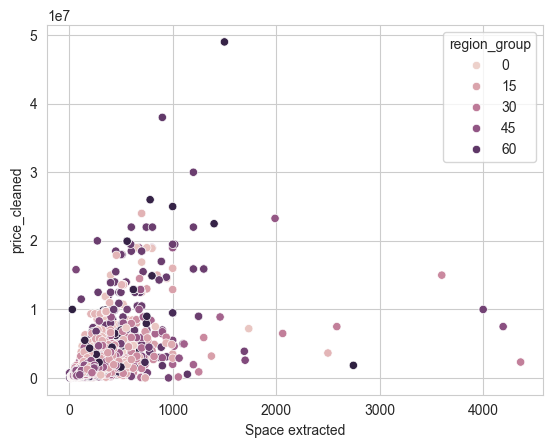

In [7]:
sns.scatterplot(data=df, x="Space extracted", y = "price_cleaned",hue="region_group")

# Lineare Modelle mit Space extracted

In [8]:
df[['Space extracted']].isna().sum()

Space extracted    886
dtype: int64

In [9]:
df[['Space extracted']] = df[['Space extracted']].astype(float)

In [10]:
impute_mean = df.copy()
impute_mean['Space extracted'] = impute_mean['Space extracted'].fillna(impute_mean['Space extracted'].mean())
impute_delete = df.copy()
impute_delete = impute_delete.dropna(subset=['Space extracted'])
impute_median = df.copy()
impute_median['Space extracted'] = impute_median['Space extracted'].fillna(impute_median['Space extracted'].median())
impute_knn = df.copy()
# Versuch Fläche 1 imputieren
impute_knn.loc[impute_knn['Space extracted'] < 5, 'Space extracted'] = np.nan
imputer = KNNImputer(n_neighbors=5)
impute_knn['Space extracted'] = imputer.fit_transform(impute_knn[['Space extracted']])

In [11]:
y = np.log(impute_knn[['price_cleaned']].values)
X = np.log(impute_knn[['Space extracted']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

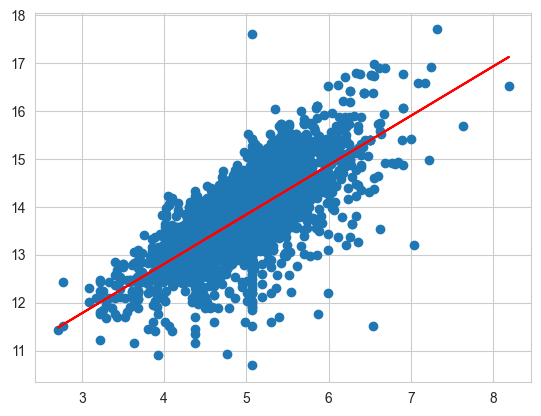

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.show()

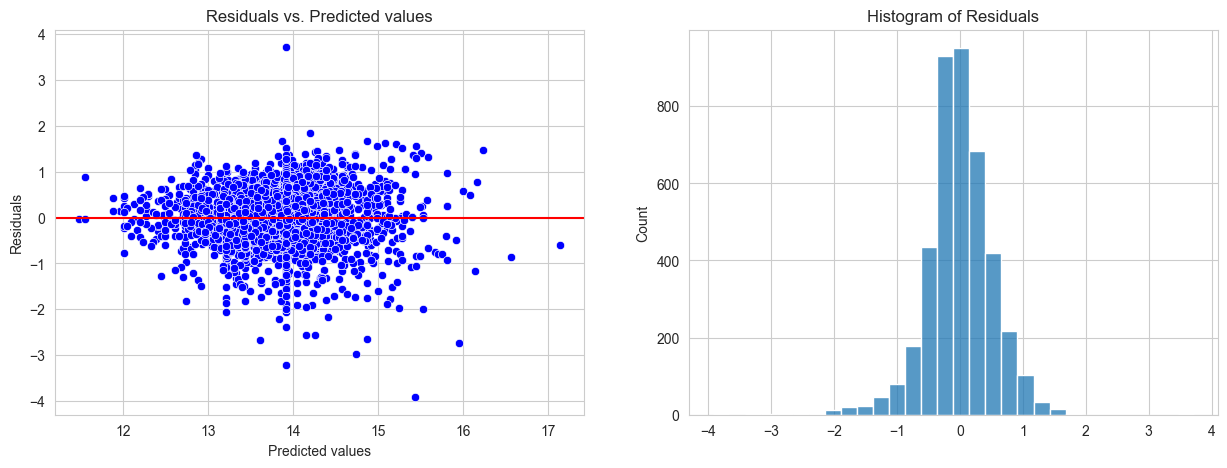

In [13]:
plot_residuals(y_test.flatten(), y_pred.flatten())

In [14]:
#create df with X_test and y_test and y_pred
df_pred = pd.DataFrame(data={'Space extracted': X_test.flatten(), 'price_cleaned': y_test.flatten(), 'price_pred': y_pred.flatten()})

df_pred["Diff"] = df_pred["price_cleaned"] - df_pred["price_pred"]
df_pred

,Space extracted,price_cleaned,price_pred,Diff
0,4.510860,14.144814,13.338975,0.805840
1,4.779123,13.589864,13.615569,-0.025705
2,4.204693,12.608199,13.023300,-0.415101
3,4.454347,13.217674,13.280708,-0.063034
4,5.075174,14.473031,13.920813,0.552217
...,...,...,...,...
4157,4.983607,13.652992,13.826403,-0.173411
4158,4.574711,13.337475,13.404809,-0.067334
4159,5.063224,14.269766,13.908493,0.361273
4160,5.247024,14.070153,14.098000,-0.027847


In [15]:
#scaling y_pred back to original scale
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

r2, R2_adjusted, mape = calculate_metrics(X_train,y_test, y_pred)
print(f"R2 {r2},Adjusted R^2:{R2_adjusted}, MAPE:{mape}%")

R2 0.348,Adjusted R^2:0.3478, MAPE:47.4041%


# Lineare Modelle mit Space extracted und No. of rooms

In [16]:
df_two_features = df[['Space extracted', 'No. of rooms:', 'price_cleaned']].copy()

In [17]:
imputer = KNNImputer(n_neighbors=5)
df_two_features['Space extracted'] = imputer.fit_transform(df_two_features[['Space extracted']])
df_two_features['No. of rooms:'] = imputer.fit_transform(df_two_features[['No. of rooms:']])

In [18]:
df_two_features["Space extracted"] = np.log(df_two_features[['Space extracted']])
df_two_features["No. of rooms:"] = np.log(df_two_features[['No. of rooms:']])

In [19]:
X = df_two_features.drop(columns=["price_cleaned"]).values
y = np.log(df_two_features[['price_cleaned']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#standardizing with scikit learn
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)       # Transform test data with the same scaler

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


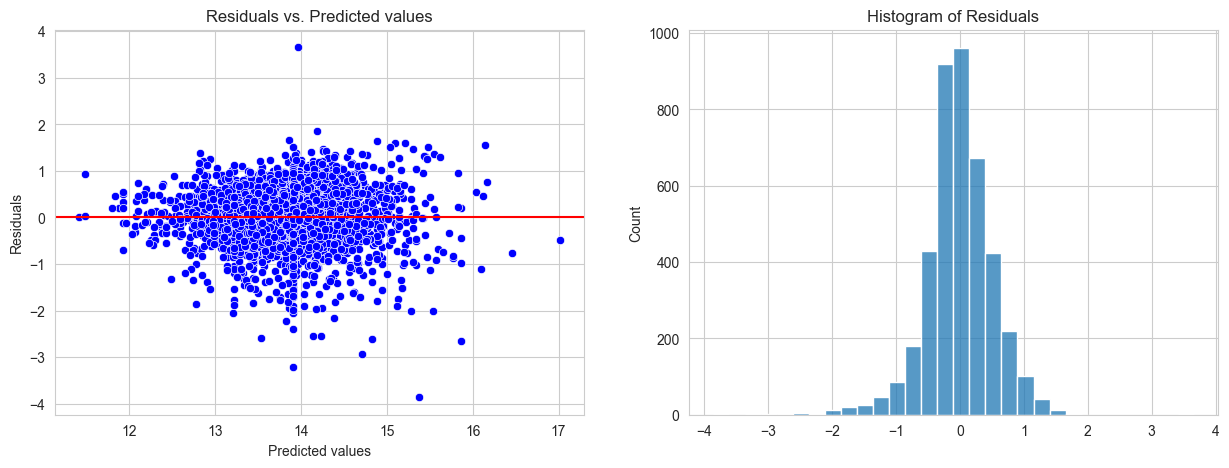

In [20]:
plot_residuals(y_test.flatten(), y_pred.flatten())

In [21]:
#scaling y_pred back to original scale
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

r2, R2_adjusted, mape = calculate_metrics(X_train,y_test, y_pred)
print(f"R2 {r2},Adjusted R^2:{R2_adjusted}, MAPE:{mape}%")

R2 0.3552,Adjusted R^2:0.3549, MAPE:47.2467%


# Modelle mit einfachen Features


In [22]:
easy_features = ["Floor","price_cleaned","detail_responsive#surface_usable","Number of floors:","Plot_area_unified","Space extracted","No. of rooms:","type_unified"]

df_small = df[easy_features].copy()
df_small.head()

,Floor,price_cleaned,detail_responsive#surface_usable,Number of floors:,Plot_area_unified,Space extracted,No. of rooms:,type_unified
0,4.0,1150000.0,0.0,1.0,0.0,100.0,5.0,penthouse
1,0.0,1420000.0,0.0,1.0,222.0,156.0,5.0,terrace-house
2,2.0,720000.0,0.0,1.0,0.0,93.0,5.0,penthouse
3,0.0,1430000.0,0.0,1.0,370.0,154.0,5.0,detached-house
4,0.0,995000.0,0.0,1.0,0.0,142.0,5.0,flat


In [23]:
#Fill na for Floor, Space extracted No. of rooms: with knn
imputer = KNNImputer(n_neighbors=5)
df_small['Floor'] = imputer.fit_transform(df_small[['Floor']])
df_small['Space extracted'] = imputer.fit_transform(df_small[['Space extracted']])
df_small['No. of rooms:'] = imputer.fit_transform(df_small[['No. of rooms:']])

In [24]:
df_small.isna().sum()

Floor                               0
price_cleaned                       0
detail_responsive#surface_usable    0
Number of floors:                   0
Plot_area_unified                   0
Space extracted                     0
No. of rooms:                       0
type_unified                        0
dtype: int64

In [25]:
df_small['Space extracted'] = np.log(df_small[['Space extracted']])
df_small = pd.get_dummies(df_small, columns=['type_unified'], drop_first=True)

In [26]:
X = df_small.drop(columns=["price_cleaned"]).values
y = np.log(df_small[['price_cleaned']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#standardizing with scikit learn
scaler = StandardScaler()
X_train[:, :6] = scaler.fit_transform(X_train[:, :6])
X_test[:, :6] = scaler.transform(X_test[:, :6])

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

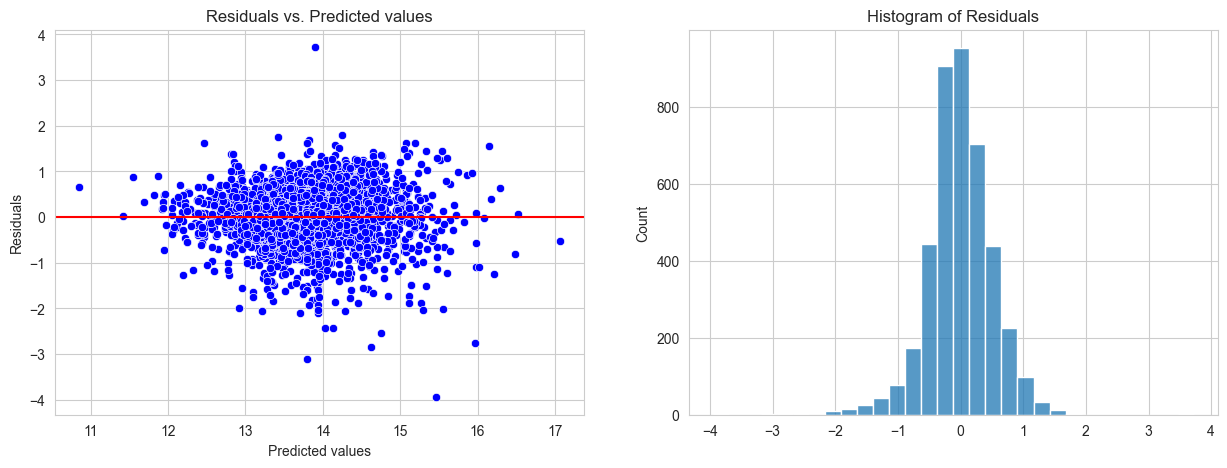

In [27]:
plot_residuals(y_test.flatten(), y_pred.flatten())

In [13]:
#scaling y_pred back to original scale
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

r2, R2_adjusted, mape = calculate_metrics(X_train,y_test, y_pred)
print(f"R2 {r2},Adjusted R^2:{R2_adjusted}, MAPE:{mape}%")

R2 0.3114,Adjusted R^2:0.3071, MAPE:46.8157%


# Modelle mit bestehen Features + Standort

In [6]:
df.head()

,Availability,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,...,gde_workers_total,price_cleaned,Space extracted,type_unified,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,region_group
0,On request,4.0,0.0,NaN,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,331.0,1150000.0,100.0,penthouse,0.0,5.0,NaN,NaN,1.0,75.0
1,On request,0.0,0.0,242.0,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,331.0,1420000.0,156.0,terrace-house,222.0,5.0,NaN,NaN,1.0,75.0
2,Immediately,2.0,0.0,NaN,0.163362,0.095877,0.001911,0.0,0.0,0.0,...,33493.0,720000.0,93.0,penthouse,0.0,5.0,NaN,NaN,1.0,75.0
3,On request,0.0,0.0,257.0,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,331.0,1430000.0,154.0,detached-house,370.0,5.0,NaN,NaN,1.0,75.0
4,On request,0.0,0.0,NaN,0.333865,0.279276,0.145835,0.0,0.0,0.0,...,1355.0,995000.0,142.0,flat,0.0,5.0,NaN,NaN,1.0,75.0


In [8]:
experiment_standort = ["Floor","price_cleaned","detail_responsive#surface_usable","Number of floors:","Plot_area_unified","Space extracted","No. of rooms:","type_unified", "region_group"]
df_3 = df[experiment_standort].copy()
df_3.head()

,Floor,price_cleaned,detail_responsive#surface_usable,Number of floors:,Plot_area_unified,Space extracted,No. of rooms:,type_unified,region_group
0,4.0,1150000.0,0.0,1.0,0.0,100.0,5.0,penthouse,75.0
1,0.0,1420000.0,0.0,1.0,222.0,156.0,5.0,terrace-house,75.0
2,2.0,720000.0,0.0,1.0,0.0,93.0,5.0,penthouse,75.0
3,0.0,1430000.0,0.0,1.0,370.0,154.0,5.0,detached-house,75.0
4,0.0,995000.0,0.0,1.0,0.0,142.0,5.0,flat,75.0


In [9]:
df_3.isna().sum()

Floor                               3121
price_cleaned                          0
detail_responsive#surface_usable       0
Number of floors:                      0
Plot_area_unified                      0
Space extracted                      883
No. of rooms:                        622
type_unified                           0
region_group                           0
dtype: int64

In [ ]:
df_3['Space extracted'] = np.log(df_3[['Space extracted']])
df_3

In [ ]:
df_3 = pd.get_dummies(df_3, columns=['type_unified'], drop_first=True)
df_3 = pd.get_dummies(df_3, columns=['region_group'], drop_first=True)

X = df_3.drop(columns=["price_cleaned"]).values
print(X.shape)
y = np.log(df_3[['price_cleaned']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#standardizing with scikit learn
scaler = StandardScaler()
X_train[:, :6] = scaler.fit_transform(X_train[:, :6])
X_test[:, :6] = scaler.transform(X_test[:, :6])

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
plot_residuals(y_test.flatten(), y_pred.flatten())

In [ ]:
#plotting predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

In [ ]:
#scaling y_pred back to original scale
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

r2, R2_adjusted, mape = calculate_metrics(X_train,y_test, y_pred)
print(f"R2 {r2},Adjusted R^2:{R2_adjusted}, MAPE:{mape}%")

In [ ]:
#print training metrics
y_pred_train = model.predict(X_train)
r2, R2_adjusted, mape = calculate_metrics(X_train,y_train, y_pred_train)
print(f"R2 {r2},Adjusted R^2:{R2_adjusted}, MAPE:{mape}%")

# Lasso Regression

In [15]:
df.head()

,Availability,Floor,detail_responsive#surface_usable,Floor_space_merged,lat,lon,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,...,gde_workers_total,price_cleaned,Space extracted,type_unified,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,region_group
0,On request,4.0,0.0,NaN,47.417100,8.085600,0.511176,0.286451,0.090908,0.0,...,331.0,1150000.0,100.0,penthouse,0.0,5.0,NaN,NaN,1.0,14.0
1,On request,0.0,0.0,242.0,47.419500,8.082700,0.511176,0.286451,0.090908,0.0,...,331.0,1420000.0,156.0,terrace-house,222.0,5.0,NaN,NaN,1.0,14.0
2,Immediately,2.0,0.0,NaN,47.403300,8.033000,0.163362,0.095877,0.001911,0.0,...,33493.0,720000.0,93.0,penthouse,0.0,5.0,NaN,NaN,1.0,14.0
3,On request,0.0,0.0,257.0,47.415643,8.085423,0.511176,0.286451,0.090908,0.0,...,331.0,1430000.0,154.0,detached-house,370.0,5.0,NaN,NaN,1.0,14.0
4,On request,0.0,0.0,NaN,47.403824,8.048288,0.333865,0.279276,0.145835,0.0,...,1355.0,995000.0,142.0,flat,0.0,5.0,NaN,NaN,1.0,14.0


In [16]:
df["region_group"] = df["region_group"].astype("category")
df["type_unified"] = df["type_unified"].astype("category")
df["Availability"] = df["Availability"].astype("category")

In [17]:
X = df.drop("price_cleaned", axis=1)
y = np.log(df["price_cleaned"])
X["Space extracted"] = np.log(X["Space extracted"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kategorische und numerische Spalten definieren
cat_col = ['region_group', 'type_unified', 'Availability']
numerical_features = [col for col in df.columns if col not in cat_col + ["price_cleaned"]]

# Preprocessing für numerische Daten
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Fehlwerte auffüllen
    ('scaler', StandardScaler())  # Standardisieren
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, cat_col)
    ]
)

# Pipeline nur für das Preprocessing erstellen
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [19]:
def exp_mape(y_true, y_pred):
    y_true_exp = np.exp(y_true)
    y_pred_exp = np.exp(y_pred)
    return mean_absolute_percentage_error(y_true_exp, y_pred_exp)

exp_mape_scorer = make_scorer(exp_mape, greater_is_better=False)

In [20]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.0001,0.001, 0.01, 0.1]

for alpha in alpha_values:
    print(f"\nEvaluating Lasso Regression with alpha = {alpha}")
    lasso = Lasso(alpha=alpha, random_state=42)

    # Pipeline with preprocessing and Lasso model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('lasso', lasso)
    ])

    # Cross-validation with custom MAPE scorer
    cv_scores = cross_val_score(model_pipeline, X, y, cv=kfold, scoring=exp_mape_scorer)

    print("Cross-Validation MAPE scores:", -cv_scores)
    print("Mean MAPE:", -cv_scores.mean())
    print("Standard Deviation of MAPE:", cv_scores.std())


Evaluating Lasso Regression with alpha = 0.0001


C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+02, tolerance: 9.832e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+02, tolerance: 9.884e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Cross-Validation MAPE scores: [0.31151045 0.30753779 0.35384318 0.31074834 0.38099617]
Mean MAPE: 0.3329271839396984
Standard Deviation of MAPE: 0.02947305585703855

Evaluating Lasso Regression with alpha = 0.001
Cross-Validation MAPE scores: [0.32129581 0.31712531 0.37114229 0.32020075 0.39819822]
Mean MAPE: 0.3455924769211447
Standard Deviation of MAPE: 0.03306237830060761

Evaluating Lasso Regression with alpha = 0.01
Cross-Validation MAPE scores: [0.35701268 0.35123006 0.4187535  0.34848366 0.43739516]
Mean MAPE: 0.38257501182460185
Standard Deviation of MAPE: 0.03771549084297921

Evaluating Lasso Regression with alpha = 0.1


KeyboardInterrupt: 

In [38]:
# Fit the model with the best alpha value
lasso = Lasso(alpha=0.001, random_state=42)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', lasso)
])
model_pipeline.fit(X_train, y_train)

# Predict the target values
y_pred = model_pipeline.predict(X_test)


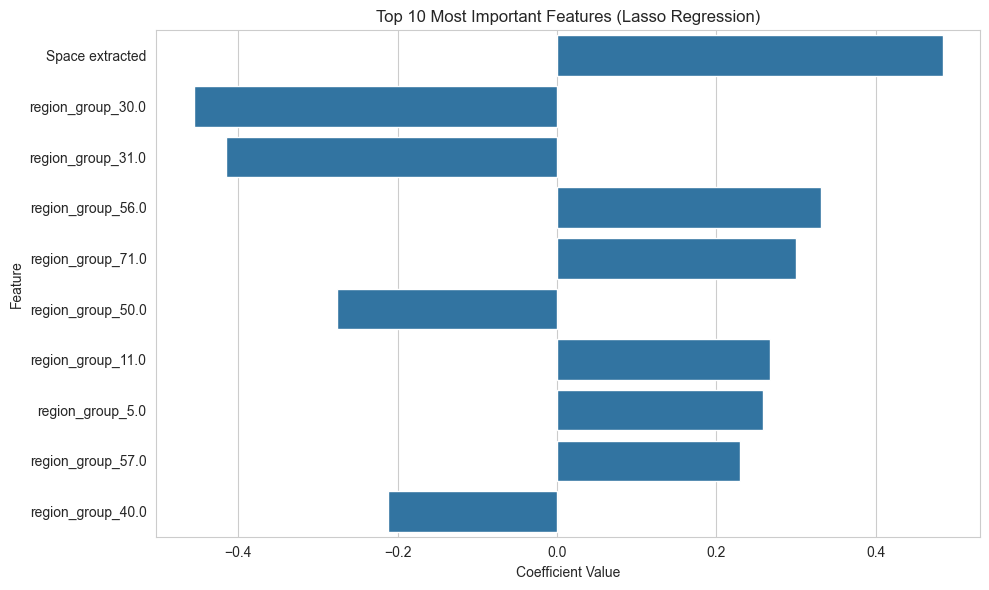

In [39]:
numerical_features_transformed = numerical_features
categorical_features_transformed = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_col)

all_features = np.concatenate([numerical_features_transformed, categorical_features_transformed])
coef = model_pipeline.named_steps['lasso'].coef_

coef_df = pd.DataFrame({'feature': all_features, 'coefficient': coef})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='coefficient', y='feature')
plt.title('Top 10 Most Important Features (Lasso Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [40]:
# Calculate MAPE
test_mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
train_mape = mean_absolute_percentage_error(np.exp(y_train), np.exp(model_pipeline.predict(X_train)))


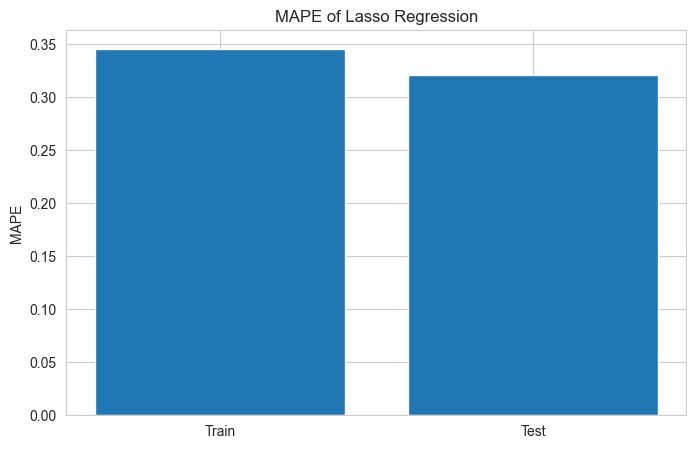

In [41]:
#plot mape
plt.figure(figsize=(8, 5))
plt.bar(["Train", "Test"], [train_mape,test_mape])
plt.ylabel("MAPE")
plt.title("MAPE of Lasso Regression")
plt.show()